#### Import Libraries:::

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Functions for reading trainning and test data:

In [137]:
#Function to read the ubyte images file:
def read_ubyte_images(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')  
        num_images = int.from_bytes(f.read(4), 'big')   
        rows = int.from_bytes(f.read(4), 'big')        
        cols = int.from_bytes(f.read(4), 'big')        
        
        # Read image data (num_images * rows * cols)
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape(num_images, rows, cols)
    return images

In [138]:
#Function to read the ubyte images label file:
def read_ubyte_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')  
        num_labels = int.from_bytes(f.read(4), 'big')  
        
        # Read label data (num_labels)
        label_data = np.frombuffer(f.read(), dtype=np.uint8)
    
    return label_data

In [139]:
train_images = read_ubyte_images('./data/train-images.idx3-ubyte')
train_labels = read_ubyte_labels('./data/train-labels.idx1-ubyte')
test_images = read_ubyte_images('./data/t10k-images.idx3-ubyte')
test_labels = read_ubyte_labels('./data/t10k-labels.idx1-ubyte')

#### Normalizing the images to scale them

In [140]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [141]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Checking first few images::::

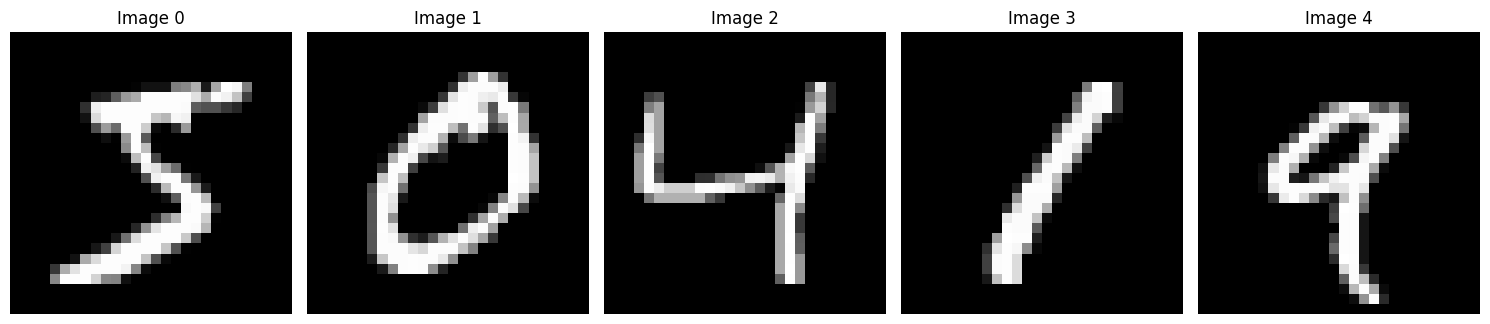

In [142]:
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Plot each image in a row
for i in range(num_images):
    image = train_images[i]
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Image {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [143]:
df_labels = pd.Series(train_labels)
print(df_labels.head())

0    5
1    0
2    4
3    1
4    9
dtype: uint8


#### Trainning the random forest model::::

In [144]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt', min_samples_split=5, min_samples_leaf=2,bootstrap=True)
model.fit(train_images.reshape(-1, 28*28), train_labels)   

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)

#### Predicting the value on train dataset:::

In [145]:
train_pred = model.predict(train_images.reshape(-1, 28*28))

In [146]:
train_acc = accuracy_score(train_labels, train_pred)

print(f"Training Accuracy: {train_acc:.4f}")

class_report = classification_report(train_labels, train_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.9988
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



#### Predicting the value on test dataset:::

In [147]:
test_pred = model.predict(test_images.reshape(-1, 28*28))

In [148]:
test_acc = accuracy_score(test_labels, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")

class_report = classification_report(test_labels, test_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.9988
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Conclusion:
- As we can see, all the overall accuracy of the model in the test dataset is 97% and also From the Classification Metrics, the precision to correctly predict each number is more than 96%. the same goes for f1 score.